<a href="https://colab.research.google.com/github/ecoglhf/labs_ML/blob/main/lab1_Chetvertak_kn_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1 ML Chetvertak Oleksandr KN-32**



---

Мета: навчитись реалізовувати лінійну регресію та градієнтний спуск.
Завдання:
Викачати дані з https://drive.google.com/drive/folders/17Xwk2quPb1gFmjG3KVIoZqChrWdcZ8XS?usp=sharing
Реалізувати лінійну регресію, яка за допомогою даних з колонки “x” прогнозує значення в колонці “y” (перша колонка у файлах - просто індекс, не ознака, не потрібно її використовувати). Тренування алгоритму повинно відбуватись лише на даних з train датасету. Test датасет слугує для перевірки якості вже натренованої моделі.
Візуалізувати дані з lab1_train.csv.
Після кожної епохи виводити поточні значення ваг та функції втрат. Використовувати Mean Squared Error як функцію втрат.
Після того, як градієнтний спуск зійшовся, порахувати функцію втрат на тестових даних з lab1_test.csv.
Візуалізувати на одному графіку дані з lab1_train.csv,  lab1_test.csv та лінію, до якої зійшовся розв’язок.
Існує багато способів підібрати ваги в лінійній регресії, але в даній лабораторній потрібно використати градієнтний спуск, а саме класичний (батчевий) градієнтний спуск, тобто одне оновлення ваг на одну епоху - не стохастичний і не мінібатчевий.




In [102]:
from google.colab import drive

import numpy as np

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/'

train = np.loadtxt(file_path + "lab_1_train.csv", delimiter = ",", skiprows = 1)
test = np.loadtxt(file_path + "lab_1_test.csv", delimiter = ",", skiprows = 1)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
train = train[:, 1:]
test = test[:, 1:]

np.set_printoptions(suppress = True)

print("Train data:\n", train)
print("\nTest data:\n", test)

Train data:
 [[ 0.         20.14901425]
 [ 0.01010101 19.97872273]
 [ 0.02020202 20.2347106 ]
 [ 0.03030303 20.51751502]
 [ 0.04040404 20.01056207]
 [ 0.05050505 20.03076901]
 [ 0.06060606 20.59497597]
 [ 0.07070707 20.37164456]
 [ 0.08080808 20.02077385]
 [ 0.09090909 20.34458619]
 [ 0.1010101  20.06299489]
 [ 0.11111111 20.0825033 ]
 [ 0.12121212 20.31501292]
 [ 0.13131313 19.68864219]
 [ 0.14141414 19.76535293]
 [ 0.15151515 20.13434404]
 [ 0.16161616 20.01938299]
 [ 0.17171717 20.43770854]
 [ 0.18181818 20.09122914]
 [ 0.19191919 19.96014727]
 [ 0.2020202  20.84373503]
 [ 0.21212121 20.35650953]
 [ 0.22222222 20.46470291]
 [ 0.23232323 20.03722201]
 [ 0.24242424 20.32153367]
 [ 0.25252525 20.53832728]
 [ 0.26262626 20.17995445]
 [ 0.27272727 20.65816395]
 [ 0.28282828 20.38546496]
 [ 0.29292929 20.49835046]
 [ 0.3030303  20.42554862]
 [ 0.31313131 21.18194608]
 [ 0.32323232 20.64241548]
 [ 0.33333333 20.34935339]
 [ 0.34343434 20.93363216]
 [ 0.35353535 20.34081761]
 [ 0.36363636 2

In [104]:
x_train = train[:, 0].tolist()
y_train = train[:, 1].tolist()

x_test = test[:, 0].tolist()
y_test = test[:, 1].tolist()


# Візуалізація

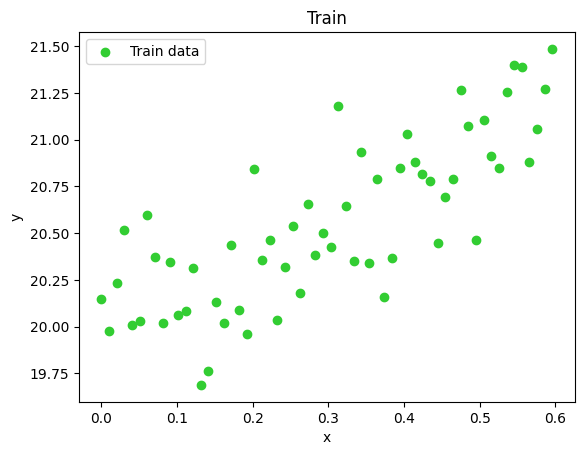

In [105]:

plt.scatter(x_train, y_train, color = "limegreen", label = "Train data")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Train")
plt.legend()

In [106]:
def predict(x, weights):
    # weights[0] is the bias (intercept)
    # weights[1] is the slope
    return weights[0] + weights[1] * x

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

print("Defined predict function and mse_loss function.")

Defined predict function and mse_loss function.


In [107]:
import numpy as np


weights = np.random.randn(2) # weights[0] is bias, weights[1] is slope


learning_rate = 0.03
epochs = 2000


x_train_np = np.array(x_train)
y_train_np = np.array(y_train)

print(f"Initial Weights (Bias, Slope): {weights[0]:.4f}, {weights[1]:.4f}")

for epoch in range(epochs):

    y_pred = predict(x_train_np, weights)

    loss = mse_loss(y_train_np, y_pred)


    bias_gradient = np.mean(y_pred - y_train_np)

    slope_gradient = np.mean((y_pred - y_train_np) * x_train_np)

    weights[0] = weights[0] - learning_rate * bias_gradient
    weights[1] = weights[1] - learning_rate * slope_gradient

    if (epoch + 1) % 100 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}: Weights (Bias, Slope) = {weights[0]:.4f}, {weights[1]:.4f}, Loss = {loss:.4f}")

print("Gradient Descent training complete.")

Initial Weights (Bias, Slope): 0.7431, 0.5640
Epoch 1: Weights (Bias, Slope) = 1.3323, 0.7409, Loss = 385.7998
Epoch 100: Weights (Bias, Slope) = 18.1630, 5.5432, Loss = 1.0365
Epoch 200: Weights (Bias, Slope) = 18.8767, 5.4299, Loss = 0.4412
Epoch 300: Weights (Bias, Slope) = 18.9845, 5.1576, Loss = 0.3836
Epoch 400: Weights (Bias, Slope) = 19.0639, 4.9012, Loss = 0.3355
Epoch 500: Weights (Bias, Slope) = 19.1363, 4.6654, Loss = 0.2948
Epoch 600: Weights (Bias, Slope) = 19.2028, 4.4486, Loss = 0.2605
Epoch 700: Weights (Bias, Slope) = 19.2639, 4.2492, Loss = 0.2314
Epoch 800: Weights (Bias, Slope) = 19.3200, 4.0660, Loss = 0.2069
Epoch 900: Weights (Bias, Slope) = 19.3717, 3.8975, Loss = 0.1862
Epoch 1000: Weights (Bias, Slope) = 19.4192, 3.7427, Loss = 0.1686
Epoch 1100: Weights (Bias, Slope) = 19.4628, 3.6003, Loss = 0.1538
Epoch 1200: Weights (Bias, Slope) = 19.5029, 3.4694, Loss = 0.1413
Epoch 1300: Weights (Bias, Slope) = 19.5398, 3.3491, Loss = 0.1307
Epoch 1400: Weights (Bias, 

In [108]:
x_test_np = np.array(x_test)
y_test_np = np.array(y_test)

y_test_pred = predict(x_test_np, weights)

test_loss = mse_loss(y_test_np, y_test_pred)

print(f"Final Weights (Bias, Slope) = {weights[0]:.4f}, {weights[1]:.4f}")
print(f"Mean Squared Error on Test Data: {test_loss:.4f}")

Final Weights (Bias, Slope) = 19.7268, 2.7391
Mean Squared Error on Test Data: 0.1913


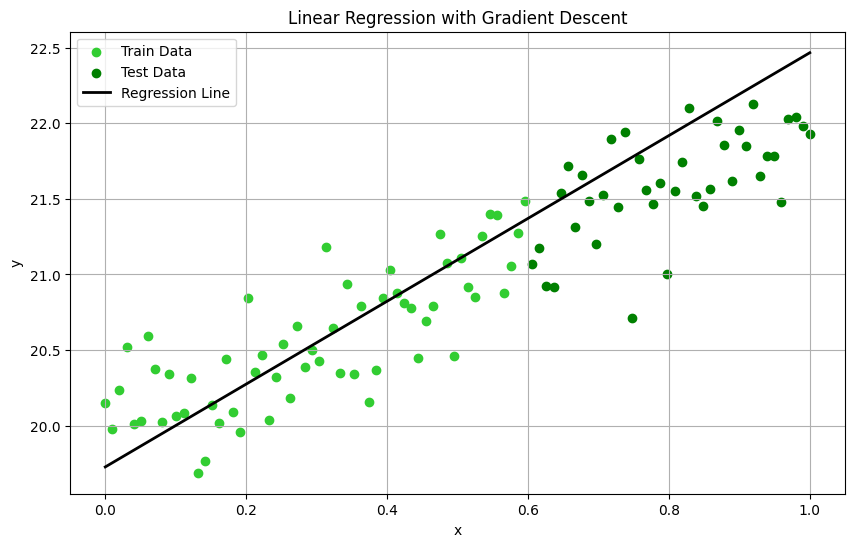

In [109]:
import matplotlib.pyplot as plt

x_line = np.linspace(min(x_train_np.min(), x_test_np.min()), max(x_train_np.max(), x_test_np.max()), 100)
y_line = predict(x_line, weights)

plt.figure(figsize=(10, 6))

plt.scatter(x_train_np, y_train_np, color='limegreen', label='Train Data')


plt.scatter(x_test_np, y_test_np, color='green', label='Test Data')

plt.plot(x_line, y_line, color='black', label='Regression Line', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()
